## 8 -> Customer Segmentation

### Reading Data

In [256]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

customer_metrics = pd.read_csv('../data/processed/customer_metrics.csv')

### Scaling Features

In [257]:
segmentation_features = ['total_spend', 'purchase_frequency', 'customer_lifespan']

scaler = StandardScaler()
scaled_features = scaler.fit_transform(customer_metrics[segmentation_features])
scaled_features # numpy array with standard deviation

array([[ 8.35866818e+00, -4.29523379e-01, -9.85847287e-01],
       [ 2.50966264e-01, -4.56184324e-01,  1.77862815e+00],
       [-2.85960062e-02, -4.76853647e-01,  1.14826699e+00],
       ...,
       [-2.08742313e-01, -4.77296814e-01, -9.72658958e-02],
       [ 4.51854283e-03, -3.61966955e-01,  1.53559734e+00],
       [-2.41412738e-02, -4.59144682e-01,  2.06522614e-01]])

In [258]:
inertias = []
K = range(1, 11)

for k in K:
  kmeans = KMeans(n_clusters=k, random_state=42)
  kmeans.fit(scaled_features)
  inertias.append(kmeans.inertia_)

c:\Users\ychow\anaconda3\envs\journeyenv\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\ychow\anaconda3\envs\journeyenv\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\ychow\anaconda3\envs\journeyenv\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\ychow\anaconda3\envs\journeyenv\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of

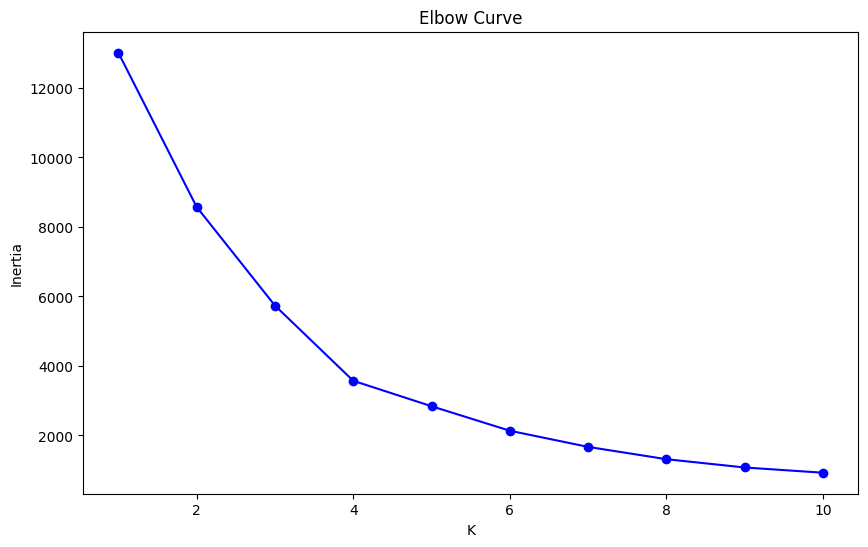

In [259]:
plt.figure(figsize=(10, 6))
plt.plot(K, inertias, 'bo-')
plt.xlabel('K')
plt.ylabel('Inertia')
plt.title('Elbow Curve')
plt.show()

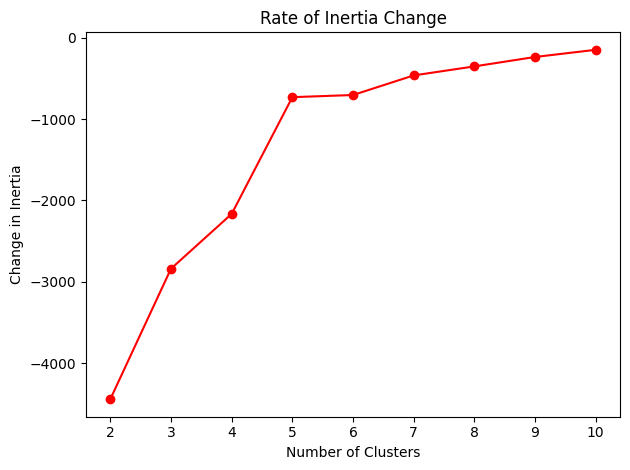

In [260]:
inertia_changes = np.diff(inertias)
plt.plot(K[1:], inertia_changes, 'ro-')
plt.xlabel('Number of Clusters')
plt.ylabel('Change in Inertia')
plt.title('Rate of Inertia Change')
plt.tight_layout()
plt.show()

In [261]:
kmeans = KMeans(n_clusters=4, random_state=42)
customer_metrics['Segment'] = kmeans.fit_predict(scaled_features)

c:\Users\ychow\anaconda3\envs\journeyenv\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [262]:
segment_analysis = customer_metrics.groupby('Segment').agg({
  'total_spend': ['mean', 'count'],
  'purchase_frequency': 'mean',
  'customer_lifespan':'mean'
}).round(2)

In [263]:
def label_segments(row):
  if row['total_spend']['mean'] > 3000 and row['purchase_frequency']['mean'] > 100:
    return 'High Value Regular'
  elif row['total_spend']['mean'] > 3000:
    return 'High Value Irregular'
  elif row['purchase_frequency']['mean'] > 1000:
    return 'Low Value Regular'
  else:
    return 'Low Value Irregular'

segment_analysis['Segment_Label'] = segment_analysis.apply(label_segments, axis=1)

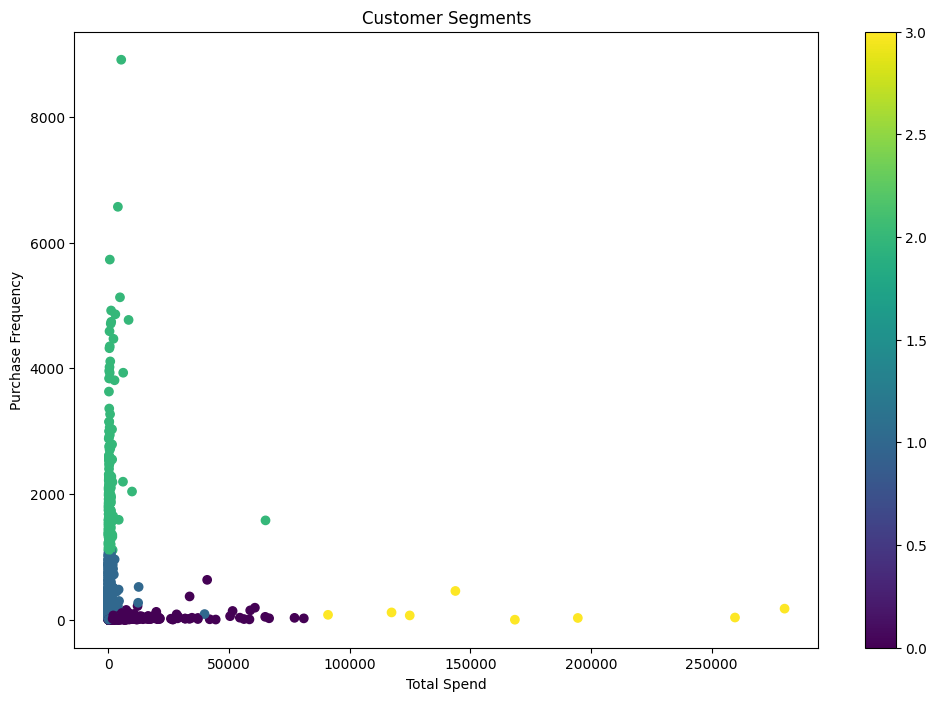

In [264]:
plt.figure(figsize=(12, 8))
scatter = plt.scatter(customer_metrics['total_spend'],
                      customer_metrics['purchase_frequency'],
                      c=customer_metrics['Segment'],
                      cmap='viridis')
plt.xlabel('Total Spend')
plt.ylabel('Purchase Frequency')
plt.title('Customer Segments')
plt.colorbar(scatter)
plt.show()

In [265]:
segment_analysis.columns = ['total_spend_mean', 'total_spend_count', 'purchase_frequency_mean',
       'customer_lifespan_mean', 'Segment_Label']
segment_analysis

,total_spend_mean,total_spend_count,purchase_frequency_mean,customer_lifespan_mean,Segment_Label
Segment,,,,,
0,3180.78,1865,16.36,267.89,High Value Irregular
1,610.78,2179,273.52,29.71,Low Value Irregular
2,938.09,286,1936.30,1.37,Low Value Regular
3,172508.53,8,120.11,337.25,High Value Regular


In [266]:
customer_metrics = customer_metrics.merge(segment_analysis, on='Segment', how='left')
customer_metrics

,CustomerID,order_count,total_spend,avg_order_value,first_purchase,last_purchase,customer_lifespan,purchase_frequency,Segment,total_spend_mean,total_spend_count,purchase_frequency_mean,customer_lifespan_mean,Segment_Label
0,12346,1,77183.60,77183.60,2011-01-18 10:01:00,2011-01-18 10:01:00,1,30.00,0,3180.78,1865,16.36,267.89,High Value Irregular
1,12347,182,4310.00,23.68,2010-12-07 14:57:00,2011-12-07 15:52:00,365,14.96,0,3180.78,1865,16.36,267.89,High Value Irregular
2,12348,31,1797.24,57.98,2010-12-16 19:09:00,2011-09-25 13:13:00,282,3.30,0,3180.78,1865,16.36,267.89,High Value Irregular
3,12349,73,1757.55,24.08,2011-11-21 09:51:00,2011-11-21 09:51:00,1,2190.00,2,938.09,286,1936.30,1.37,Low Value Regular
4,12350,17,334.40,19.67,2011-02-02 16:01:00,2011-02-02 16:01:00,1,510.00,1,610.78,2179,273.52,29.71,Low Value Irregular
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4333,18280,10,180.60,18.06,2011-03-07 09:52:00,2011-03-07 09:52:00,1,300.00,1,610.78,2179,273.52,29.71,Low Value Irregular
4334,18281,7,80.82,11.55,2011-06-12 10:53:00,2011-06-12 10:53:00,1,210.00,1,610.78,2179,273.52,29.71,Low Value Irregular
4335,18282,12,178.05,14.84,2011-08-05 13:35:00,2011-12-02 11:43:00,118,3.05,1,610.78,2179,273.52,29.71,Low Value Irregular
4336,18283,756,2094.88,2.77,2011-01-06 14:14:00,2011-12-06 12:02:00,333,68.11,0,3180.78,1865,16.36,267.89,High Value Irregular


In [267]:
customer_metrics.to_csv('../data/processed/customer_segments.csv', index=False)
segment_analysis.to_csv('../data/processed/customer_segments_with_labels.csv')